# Homework 6 RF Accuracy Improvement

This assignment is inspired by examples of Shan-Hung Wu from National Tsing Hua University.

Requirement: improve the accuracy per feature of the following code from 0.03 up to at least 0.40 and accuracy should be more than 0.92

Here are three hints:

    You can improve the ratio by picking out or "creating" several features.
    Tune hyperparameters
    The ratio can be improved from 0.03 up to 0.47.

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import seaborn

# load the breast_cancer dataset
init_data = load_breast_cancer()
(X, y) = load_breast_cancer(return_X_y=True)

print(X.shape)

# TODO Select some features (X), hint: based on the connections with
# our Y (importance? correlation?)
# TODO need 5 fold cross validation
# TODO Tune parameters for RandomForestClassifier
# TODO Calculate Average accuracy score
# TODO Calculate Average (accuracy score/number of features)

(569, 30)


worst perimeter            0.368560
mean concavity             0.327490
mean perimeter             0.048960
mean texture               0.037612
mean concave points        0.034926
area error                 0.028467
worst smoothness           0.025225
worst concavity            0.024706
perimeter error            0.014381
worst fractal dimension    0.013706
worst concave points       0.010413
concavity error            0.009377
mean area                  0.008990
worst radius               0.008694
mean smoothness            0.008284
worst area                 0.006358
worst compactness          0.005444
fractal dimension error    0.004556
worst symmetry             0.003319
symmetry error             0.002967
worst texture              0.002578
texture error              0.001844
mean compactness           0.001761
mean symmetry              0.001240
smoothness error           0.000143
mean radius                0.000000
concave points error       0.000000
radius error               0

<AxesSubplot:>

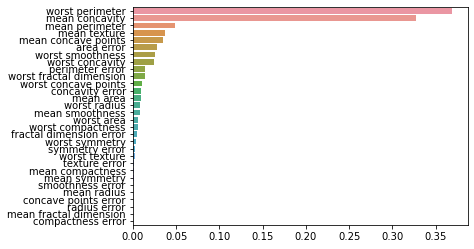

In [55]:
n_estimators = 2
model = RandomForestClassifier(n_estimators, random_state=0)

model.fit(X,y)

feature_imp = pd.Series(model.feature_importances_,index=init_data.feature_names).sort_values(ascending=False)

print(feature_imp)
print(type(feature_imp))

seaborn.barplot(x=feature_imp, y=feature_imp.index)

In [56]:
from sklearn.model_selection import cross_val_score
cur_score = cross_val_score(model, X, y, cv=5)
print(cur_score)
print(cur_score.mean())
print((cur_score.mean())/n_estimators)

[0.90350877 0.88596491 0.92105263 0.92982456 0.87610619]
0.9032914143766495
0.45164570718832475
